In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix 

In [2]:
def load_train_data():
    anchor = pd.read_csv('train_anchor_log.csv').drop(columns=['Unnamed: 0'])
    pos = pd.read_csv('train_pos_log.csv').drop(columns=['Unnamed: 0'])
    neg = pd.read_csv('train_neg_log.csv').drop(columns=['Unnamed: 0'])
    
    anchor = np.array(anchor)
    pos = np.array(pos)
    neg = np.array(neg)
    
    positive_exampels = np.hstack([anchor, pos])
    negative_exampels = np.hstack([anchor, neg])
    
    n_points, _ = positive_exampels.shape
    X = np.vstack([positive_exampels, negative_exampels])
    Y = np.vstack([np.ones((n_points, 1)), np.zeros((n_points, 1))]).ravel()
    
    return X, Y

In [3]:
def load_val_data():
    anchor = pd.read_csv('val_anchor_log.csv').drop(columns=['Unnamed: 0'])
    pos = pd.read_csv('val_pos_log.csv').drop(columns=['Unnamed: 0'])
    neg = pd.read_csv('val_neg_log.csv').drop(columns=['Unnamed: 0'])
    
    anchor = np.array(anchor)
    pos = np.array(pos)
    neg = np.array(neg)
    
    positive_exampels = np.hstack([anchor, pos])
    negative_exampels = np.hstack([anchor, neg])
    
    n_points, _ = positive_exampels.shape
    X = np.vstack([positive_exampels, negative_exampels])
    Y = np.vstack([np.ones((n_points, 1)), np.zeros((n_points, 1))]).ravel()
    
    return X, Y

In [4]:
train_x, train_y = load_train_data()
val_x, val_y = load_val_data()

In [ ]:
model = SVC()

In [ ]:
model.fit(train_x, train_y)

In [ ]:
preds = model.predict(val_x)

In [ ]:
accuracy_score(preds, val_y)

In [ ]:
sns.heatmap(confusion_matrix(val_y, preds), annot=True)

In [ ]:
preds = model.predict(train_x)

In [ ]:
accuracy_score(preds, train_y)

In [ ]:
sns.heatmap(confusion_matrix(train_y, preds), annot=True)

In [5]:
from sklearn import tree

In [6]:
clf = tree.DecisionTreeClassifier()

In [7]:
clf.fit(train_x, train_y)

DecisionTreeClassifier()

In [8]:
preds = clf.predict(train_x)

In [9]:
accuracy_score(preds, train_y)

1.0

<AxesSubplot:>

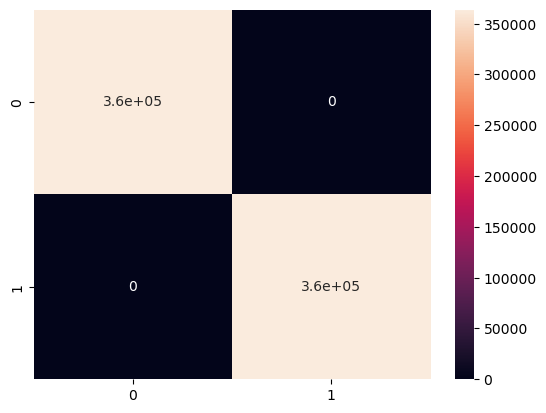

In [10]:
sns.heatmap(confusion_matrix(train_y, preds), annot=True)

In [12]:
preds = clf.predict(val_x)

In [13]:
accuracy_score(preds, val_y)

0.5033917340521115

<AxesSubplot:>

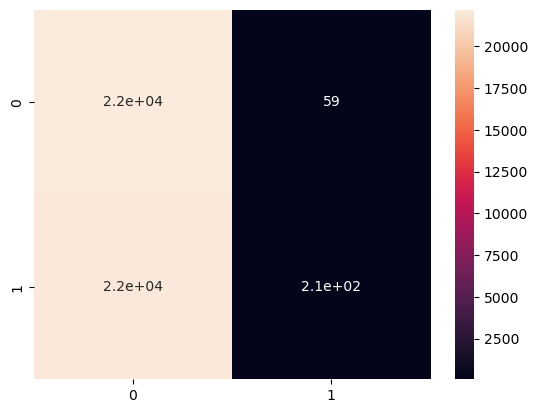

In [14]:
sns.heatmap(confusion_matrix(val_y, preds), annot=True)

In [ ]:
train_x.shape, train_y.shape

In [ ]:
val_x.shape, val_y.shape

In [ ]:
svm_pca = PCA(n_components=20)

In [ ]:
svm_pca.fit(train_x)

In [15]:
from sklearn.neural_network import MLPClassifier

In [16]:
network = MLPClassifier(hidden_layer_sizes=(64,), solver='adam')

In [17]:
network.fit(train_x, train_y)

MLPClassifier(hidden_layer_sizes=(64,))

In [18]:
preds = network.predict(val_x)

In [19]:
accuracy_score(preds, val_y)

0.5134995507637017

In [20]:
accuracy_score(network.predict(train_x), train_y)

0.999983507602995